# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
set = len(cities)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
names = ('City', 'Cloudiness', 'Country', 'Date', 'Humidity', 'Lat', 'Lng','Max Temp', 'Wind Speed')
data = pd.DataFrame(columns = names)
data

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


In [6]:
towns = []
clouds = []
country = []
date = []
hum = []
lat = []
long = []
temperature = []
winds = []

counter = 1

print("Beginning Data Retrieval\n--------------------")

for city in cities:  
    
    try: 
        response = requests.get(f"http://api.openweathermap.org/data/2.5/weather?&appid=" + api_key + "&units=Imperial&q=" + city.replace(" ","&")).json() 
        towns.append(response["name"])
        clouds.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        hum.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        long.append(response["coord"]["lon"])
        temperature.append(response["main"]["temp_max"])
        winds.append(response["wind"]["speed"])
        cityname = response["name"]
        print(f"Processing Record {counter} of Set {set} | {cityname}")
        
        counter = counter + 1
        
        time.sleep(1.01)
        
    except:
        print("City not found. Skipping...")
    continue
              
print("------------------------------\nData Retrieval Complete\n------------------------------")

Beginning Data Retrieval
--------------------
Processing Record 1 of Set 601 | Longyearbyen
City not found. Skipping...
Processing Record 2 of Set 601 | Ariquemes
Processing Record 3 of Set 601 | Gorgan
City not found. Skipping...
Processing Record 4 of Set 601 | Ushuaia
Processing Record 5 of Set 601 | Vila
Processing Record 6 of Set 601 | Jamestown
Processing Record 7 of Set 601 | Caravelas
Processing Record 8 of Set 601 | Qaanaaq
Processing Record 9 of Set 601 | Guerrero
Processing Record 10 of Set 601 | Poso
Processing Record 11 of Set 601 | Salacgriva
Processing Record 12 of Set 601 | Hobart
Processing Record 13 of Set 601 | Sambava
Processing Record 14 of Set 601 | Faanui
Processing Record 15 of Set 601 | Sao
City not found. Skipping...
Processing Record 16 of Set 601 | Kapaa
Processing Record 17 of Set 601 | Berlevag
Processing Record 18 of Set 601 | Flinders
Processing Record 19 of Set 601 | Hambantota
Processing Record 20 of Set 601 | Moussoro
Processing Record 21 of Set 601 |

Processing Record 175 of Set 601 | Kalulushi
Processing Record 176 of Set 601 | Aksha
City not found. Skipping...
Processing Record 177 of Set 601 | Formoso
Processing Record 178 of Set 601 | Jishou
Processing Record 179 of Set 601 | Minyar
Processing Record 180 of Set 601 | Damavand
Processing Record 181 of Set 601 | Muros
Processing Record 182 of Set 601 | Morondava
Processing Record 183 of Set 601 | Kodiak
Processing Record 184 of Set 601 | Cherskiy
Processing Record 185 of Set 601 | Jumla
Processing Record 186 of Set 601 | Basco
Processing Record 187 of Set 601 | Chenzhou
Processing Record 188 of Set 601 | Lebu
Processing Record 189 of Set 601 | Torbay
Processing Record 190 of Set 601 | Waipawa
Processing Record 191 of Set 601 | Bonthe
Processing Record 192 of Set 601 | Sitka
Processing Record 193 of Set 601 | Richards
City not found. Skipping...
Processing Record 194 of Set 601 | Muzhi
Processing Record 195 of Set 601 | Verkhnevilyuysk
Processing Record 196 of Set 601 | Lagoa
Proc

City not found. Skipping...
Processing Record 351 of Set 601 | Biak
Processing Record 352 of Set 601 | Ponte
Processing Record 353 of Set 601 | Fez
Processing Record 354 of Set 601 | Gaborone
Processing Record 355 of Set 601 | Iwase
Processing Record 356 of Set 601 | Kualakapuas
Processing Record 357 of Set 601 | Nayoro
Processing Record 358 of Set 601 | Antalaha
City not found. Skipping...
Processing Record 359 of Set 601 | Chivacoa
Processing Record 360 of Set 601 | Sobolevo
Processing Record 361 of Set 601 | Gorodets
Processing Record 362 of Set 601 | Izhma
Processing Record 363 of Set 601 | Letka
Processing Record 364 of Set 601 | Kununurra
Processing Record 365 of Set 601 | Kahului
Processing Record 366 of Set 601 | Padang
Processing Record 367 of Set 601 | Lamont
Processing Record 368 of Set 601 | Soltsy
Processing Record 369 of Set 601 | Howick
Processing Record 370 of Set 601 | Azle
Processing Record 371 of Set 601 | Makakilo
City not found. Skipping...
Processing Record 372 of

Processing Record 528 of Set 601 | Waldkirchen
Processing Record 529 of Set 601 | Liverpool
------------------------------
Data Retrieval Complete
------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
data['City']=towns
data['Cloudiness']=clouds
data['Country']=country
data['Date']=date
data['Humidity']=hum
data['Lat']=lat
data['Lng']=long
data['Max Temp']=temperature
data['Wind Speed']=winds

data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Longyearbyen,20,NO,1570697609,73,78.22,15.63,26.60,24.16
1,Ariquemes,78,BR,1570697611,98,-9.91,-63.03,71.64,1.30
2,Gorgan,75,IR,1570697612,65,36.84,54.43,78.80,6.93
3,Ushuaia,90,AR,1570697614,86,-54.81,-68.31,33.80,24.16
4,Vila,62,IT,1570697615,100,45.18,8.40,59.00,5.82


In [9]:
# Save data frame to CSV
data.to_csv('results.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

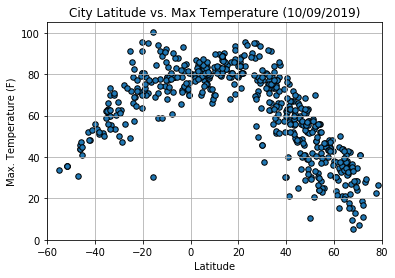

In [10]:
# Build a scatter plot for each data type
plt.scatter(data["Lat"], data["Max Temp"], marker="o", edgecolors="black", s=30)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (10/09/2019)")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.xlim(-60,80)
plt.ylim(0, 105)
plt.grid(True)

# Save the figure
plt.savefig("MaxTempLat.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

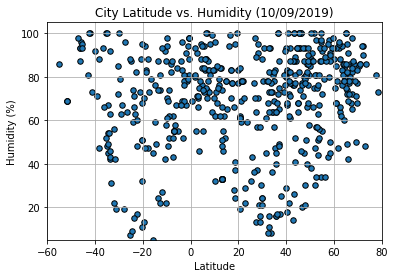

In [11]:
# Build a scatter plot for each data type
plt.scatter(data["Lat"], data["Humidity"], marker="o", edgecolors="black", s=30)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (10/09/2019)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.xlim(-60,80)
plt.ylim(5, 105)
plt.grid(True)

# Save the figure
plt.savefig("HumLat.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

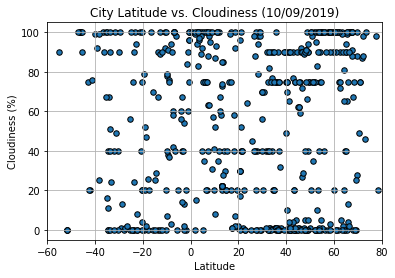

In [12]:
# Build a scatter plot for each data type
plt.scatter(data["Lat"], data["Cloudiness"], marker="o", edgecolors="black", s=30)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (10/09/2019)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.xlim(-60,80)
plt.ylim(-5, 105)
plt.grid(True)

# Save the figure
plt.savefig("CloudLat.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

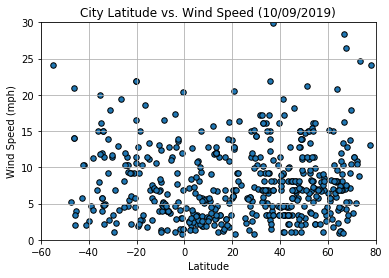

In [13]:
# Build a scatter plot for each data type
plt.scatter(data["Lat"], data["Wind Speed"], marker="o", edgecolors="black", s=30)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (10/09/2019)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.xlim(-60,80)
plt.ylim(0, 30)
plt.grid(True)

# Save the figure
plt.savefig("WindLat.png")

# Show plot
plt.show()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Honiara,75,SB,1570601582,79,-9.43,159.96,84.20,16.75
1,Mataura,100,NZ,1570601583,98,-46.19,168.86,51.01,1.99
2,Barrow,61,AR,1570601584,61,-38.31,-60.23,46.35,10.11
3,Geraldton,40,CA,1570601586,76,49.72,-86.95,51.80,8.05
4,Avarua,100,CK,1570601587,60,-21.21,-159.78,69.80,6.93
5,Nikolskoye,90,RU,1570601589,86,59.70,30.79,42.01,8.95
6,Stephenville,75,CA,1570601590,87,48.55,-58.59,48.20,11.41
7,Port Alfred,9,ZA,1570601591,83,-33.59,26.89,64.99,4.00
8,Hofn,99,IS,1570601593,89,64.25,-15.21,46.90,23.74
9,Ushuaia,40,AR,1570601594,89,-54.81,-68.31,35.60,25.28
